In [ ]:
#Algoritmo de Clasificación
import pandas as pd

df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

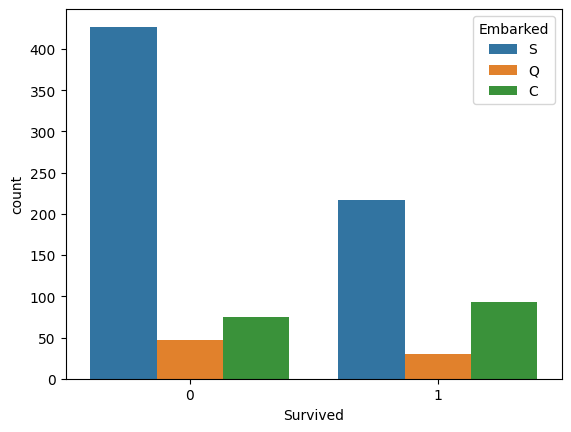

In [ ]:
import seaborn as sb

sb.countplot(x='Survived', data=df, hue="Embarked")

<Axes: xlabel='Survived', ylabel='count'>

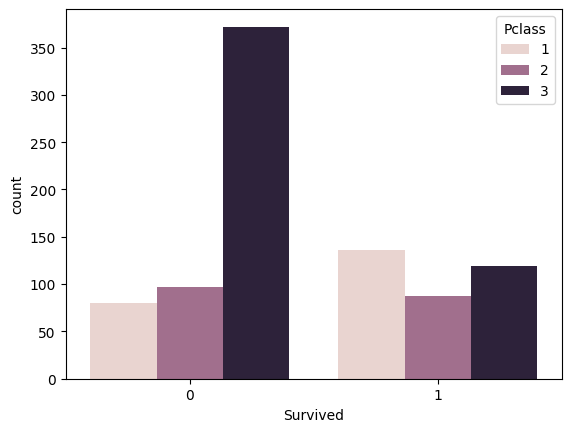

In [ ]:
sb.countplot(x='Survived', data=df, hue="Pclass")

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# df['Age'].mean()

# df['Age'].fillna(df['Age'].mean(), inplace=True)

df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
#Elimino las columnas que no necesito y que puedan confundir mi modelo
df.drop(['Cabin','Name','PassengerId','Ticket'], axis=1, inplace=True)

In [ ]:
#elimino los 2 registros del Embarked
df = df.dropna()

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#dummies para el genero
dummies_sex = pd.get_dummies(df['Sex'], dtype=int, drop_first=True)

In [ ]:
# dummies para el Embarked
dummies_embarked = pd.get_dummies(df['Embarked'], dtype=int, drop_first=True)

In [ ]:
df = pd.concat([df, dummies_sex, dummies_embarked], axis=1)
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

<Axes: >

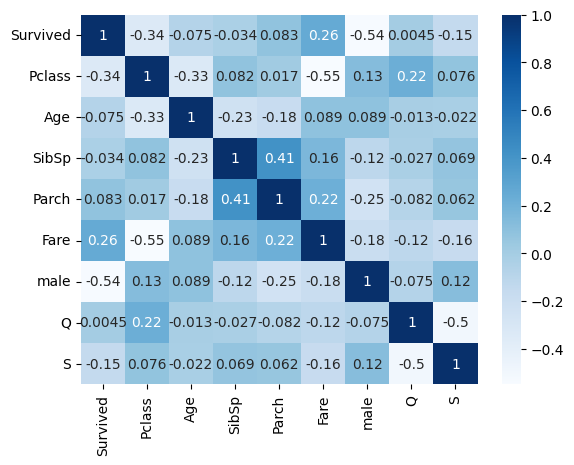

In [ ]:
sb.heatmap(df.corr(), annot=True, cmap='Blues')

In [ ]:
X = df.drop('Survived', axis=1) # Caracteristicas de Entrada
y = df['Survived'] # Etiqueta buscada

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression( max_iter=1000 )

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# df.head()
# X_train
model.predict([[ 2,30,0,0,40,1,1 ,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])